In [1]:
# This notebook contains exercises for getting started with data analysis in Python. 
# The main topics we will cover in this class are:
# 1. Building Predictive Models (supervised and unsupervised)
# 2. Evaluating Model Performance

# ###Building Predictive Models
# 1. Linear Regression
# 2. K-Means clustering

# 1. Import the required libraries
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
housing = datasets.load_boston()
housing.keys()

['data', 'feature_names', 'DESCR', 'target']

In [3]:
len(housing['target'])


506

In [4]:
housing.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], 
      dtype='|S7')

In [5]:
# Create a Pandas dataframe for feature data
pd_housing_features = pd.DataFrame(housing.data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT',])
pd_housing_features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [6]:
pd_housing_target = pd.DataFrame(housing.target)
pd_housing_target.columns = ['PRICE']
pd_housing_target.head()

,PRICE
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [7]:
#Divide the data set as train and test data

housing_X_train = pd_housing_features[:-50]
housing_X_test  = pd_housing_features[-50:]

housing_y_train = pd_housing_target[:-50]
housing_y_test  = pd_housing_target[-50:]

In [8]:
pd_housing_features[:-50]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [9]:
# Linear models: $y = \beta X + \epsilon$
# 
# This is the basic formula for fitting a straight line.
# We are trying to minimise the Sum of Errors Squared.


# Build a linear model and print out the coefficients
from sklearn import linear_model
regr = linear_model.LinearRegression()

regr.fit(housing_X_train, housing_y_train.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [10]:
#intercept
print(regr.intercept_)

35.5957129437


In [11]:
#coeficient
print(regr.coef_)

[ -1.04755725e-01   4.91233643e-02   3.24299720e-02   2.51517135e+00
  -1.76585750e+01   3.81259444e+00   1.06438518e-02  -1.43651798e+00
   3.60959247e-01  -1.54635990e-02  -9.13025678e-01   9.94705988e-03
  -5.55769911e-01]


In [12]:
pd.DataFrame(list(zip(housing_X_train.columns, regr.coef_)), columns=['attribute','reg_coefficient'])


,attribute,reg_coefficient
0,CRIM,-0.104756
1,ZN,0.049123
2,INDUS,0.032430
3,CHAS,2.515171
4,NOX,-17.658575
5,RM,3.812594
6,AGE,0.010644
7,DIS,-1.436518
8,RAD,0.360959
9,TAX,-0.015464


In [13]:
regr.predict(housing_X_test.ix[501])


23.659760444436333

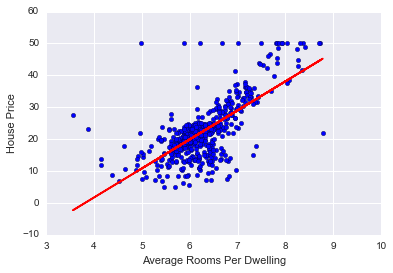

In [14]:
#Plot RM vs PRICE with regression line
% matplotlib inline
x = pd_housing_features.RM
y = pd_housing_target.PRICE

plt.subplot(1, 1, 1)
plt.scatter(x, y)
plt.xlabel('Average Rooms Per Dwelling')
plt.ylabel('House Price')

fit = np.polyfit(x, y, deg=1)
plt.plot(x, fit[0] * x + fit[1], color='red')


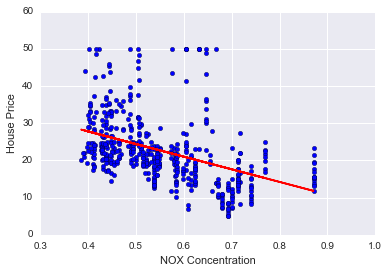

In [15]:
#Plot NOX vs PRICE with regression line

x = pd_housing_features.NOX
y = pd_housing_target.PRICE

plt.subplot(1, 1, 1)
plt.scatter(x, y)
plt.xlabel('NOX Concentration')
plt.ylabel('House Price')

fit = np.polyfit(x, y, deg=1)
plt.plot(x, fit[0] * x + fit[1], color='red')


In [16]:
# The mean square error or residual sum of squares
np.mean((regr.predict(housing_X_test)-housing_y_test.PRICE)**2)


10.966543166781191

In [17]:
# Explained variance score: 1 is perfect prediction
# and 0 means that there is no linear relationship
# between X and Y.
regr.score(housing_X_test, housing_y_test.PRICE) 

0.41861839023791725

In [18]:
from sklearn.model_selection import cross_val_predict

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validated:

x=housing_X_test
y=housing_y_test.PRICE

predicted = cross_val_predict(regr, x, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


ImportError: No module named model_selection

In [20]:
# ### Clustering (unsupervised learning)
# In this section we will look at clustering a dataset with the K-means algorithm

#import the cluster module from sklearn
from sklearn import cluster

#define the number of clusters
k = 2

#create dataset as an array of tuples
data = list(zip(housing_X_train.RM, housing_y_train.PRICE))

#create KMeans object with number of clusters set to k
kmeans = cluster.KMeans(n_clusters=k)

#fir the dataset
kmeans.fit(data)


KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances=True, random_state=None, tol=0.0001,
    verbose=0)

In [21]:
#find labels and cluster means (centroids)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_


labels


array([1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1,

In [22]:
centroids

array([[  7.15905714,  36.79619048],
       [  6.05241595,  18.7962963 ]])

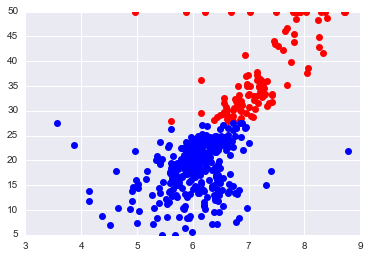

In [23]:
color = ['r','b']
for i in range(k):
    for x in np.nditer(np.where(labels==i)): 
        ds = data[x]
        plt.plot(ds[0],ds[1],color[i]+'o')
plt.show()

In [24]:
#Predicting the cluster label of a new data point
#Assume RM=7.0 and PRICE 35.0

kmeans.predict([(7.0,35.0)])

array([0], dtype=int32)

In [29]:
# Try yourself
iris = datasets.load_iris()

print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:
    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================
    :Missing Attribute Values: None
    

In [30]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])